In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Wholesale customers data.csv')

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df = df.drop(['Channel', 'Region'], axis = 1)

In [5]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [6]:
X = df.values

In [7]:
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [8]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [9]:
scores = []
for k in range(2, 11):
    gmm = GaussianMixture(n_components = k)
    gmm.fit(X)
    y_pred = gmm.predict(X)
    scores.append(silhouette_score(X, y_pred))

In [10]:
scores

[0.29525252860106327,
 0.23376799636772685,
 0.11934462777213997,
 0.13915822572130018,
 0.10213517195354634,
 0.04934340060032902,
 0.08030292040434565,
 0.08842176984696723,
 0.02619013332132944]

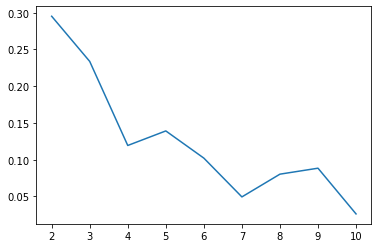

In [11]:
plt.plot(range(2,11), scores)

In [12]:
gmm = GaussianMixture(n_components = 5)

In [13]:
gmm.fit(X)

GaussianMixture(n_components=5)

In [14]:
y_pred = gmm.predict(X)

In [15]:
y_pred

array([2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       1, 3, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 0, 2, 1, 2, 0, 2, 4, 2, 0, 2, 2, 4, 2, 2, 0, 4,
       2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 4, 4, 3,
       0, 1, 0, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 0, 2, 3, 2, 3, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 4, 0, 2, 2, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 4, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 1,
       2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1,
       2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2,

In [16]:
gmm.means_

array([[10758.51950911,  1665.10394405,  2269.20594574,  2756.7047345 ,
          347.48565779,   763.70358308],
       [22467.46406005,  5780.56160723,  6140.97703561,  6115.29888241,
         1206.12174976,  2364.01433645],
       [ 6798.1669204 ,  7606.43187909, 11586.1629387 ,  1107.84015506,
         4771.29427447,  1328.40694946],
       [48746.59053773, 17974.82757282, 12556.45542962, 24425.26466465,
         1848.50633046, 12543.75975073],
       [14978.02655352, 31831.38953301, 46737.87352543,  2849.97934635,
        24463.93059393,  2406.70939042]])

In [17]:
cluster_table = pd.DataFrame(gmm.means_, columns = df.columns)

In [18]:
cluster_table

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,10758.519509,1665.103944,2269.205946,2756.704735,347.485658,763.703583
1,22467.464060,5780.561607,6140.977036,6115.298882,1206.121750,2364.014336
2,6798.166920,7606.431879,11586.162939,1107.840155,4771.294274,1328.406949
3,48746.590538,17974.827573,12556.455430,24425.264665,1848.506330,12543.759751
4,14978.026554,31831.389533,46737.873525,2849.979346,24463.930594,2406.709390


In [19]:
cluster_table.std()

Fresh               16692.496596
Milk                12135.246831
Grocery             17760.850461
Frozen               9661.149444
Detergents_Paper    10163.690601
Delicassen           4892.633558
dtype: float64